In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Install required libraries
!pip install gdown
!pip install pyunpack
!pip install patool

import gdown
import os
from pyunpack import Archive
import shutil

# Create data directories
base_path = '/kaggle/working/melanoma_data'
os.makedirs(base_path, exist_ok=True)

# Download data from Google Drive
file_id = '1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'
output_path = os.path.join(base_path, 'melanoma_dataset.zip')
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Extract the downloaded zip file
Archive(output_path).extractall(base_path)

# Create train/valid/test directories
train_dir = os.path.join(base_path, 'train')
valid_dir = os.path.join(base_path, 'valid')
test_dir = os.path.join(base_path, 'test')

for dir_path in [train_dir, valid_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)
    os.makedirs(os.path.join(dir_path, 'benign'), exist_ok=True)
    os.makedirs(os.path.join(dir_path, 'malignant'), exist_ok=True)

print(f"Data downloaded and extracted to: {base_path}")
print("Directory structure created successfully")

# Data paths for use in the model
DATA_PATHS = {
    'base_dir': base_path,
    'train_dir': train_dir,
    'valid_dir': valid_dir,
    'test_dir': test_dir
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 3.9 MB/s eta 0:00:00


Downloading...
From (original): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
From (redirected): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs&confirm=t&uuid=11becf3f-f79a-41f9-876b-a7caae89e32e
To: /kaggle/working/melanoma_data/melanoma_dataset.zip
100%|██████████| 824M/824M [00:09<00:00, 84.5MB/s] 


Data downloaded and extracted to: /kaggle/working/melanoma_data
Directory structure created successfully


In [2]:
!pip install Augmentor

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


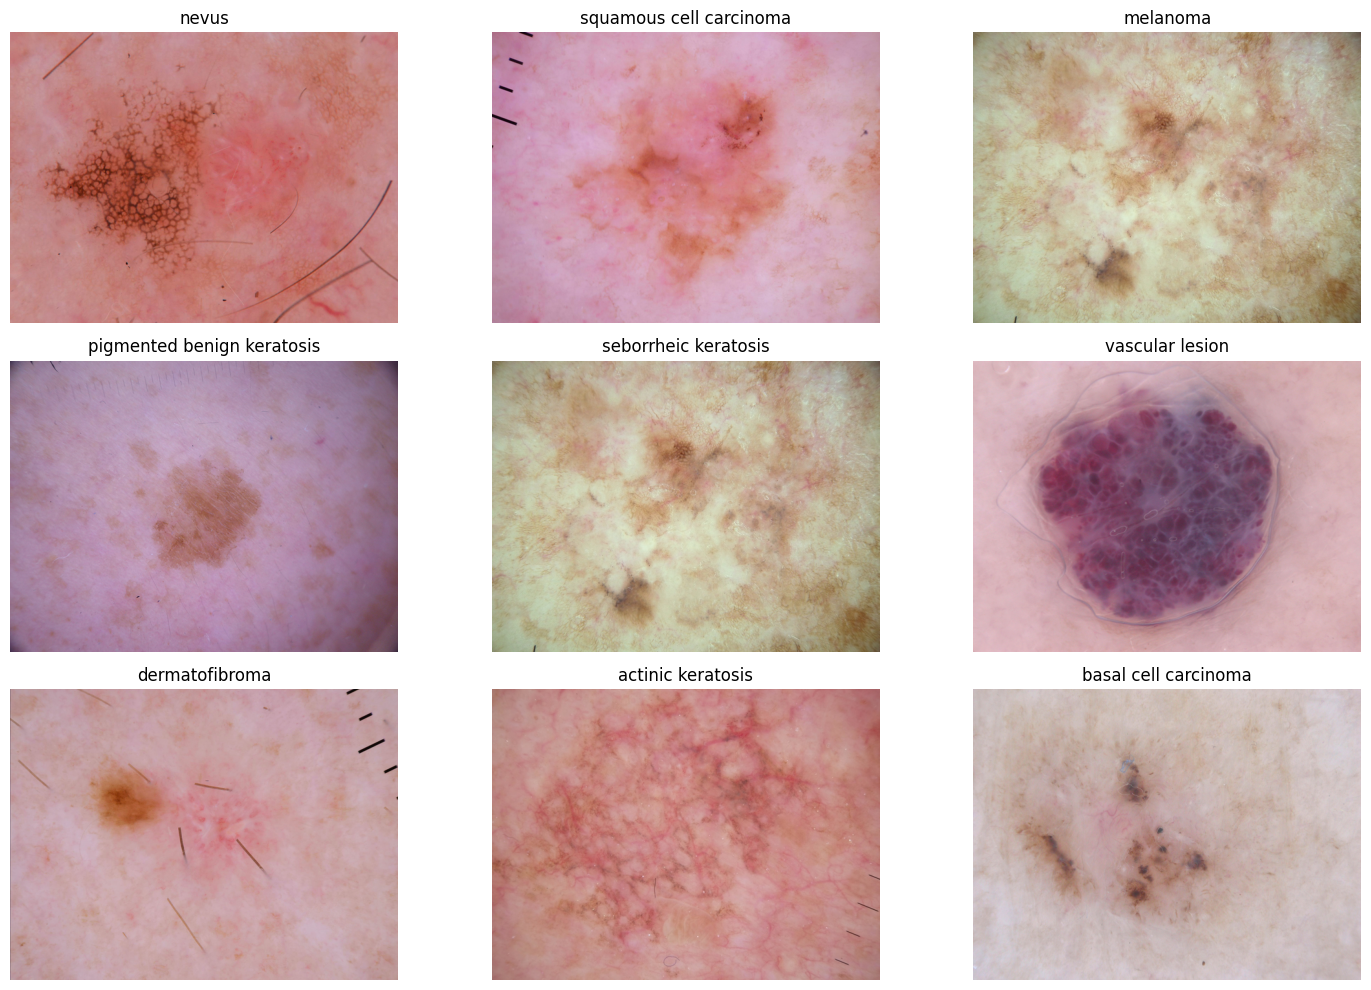

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


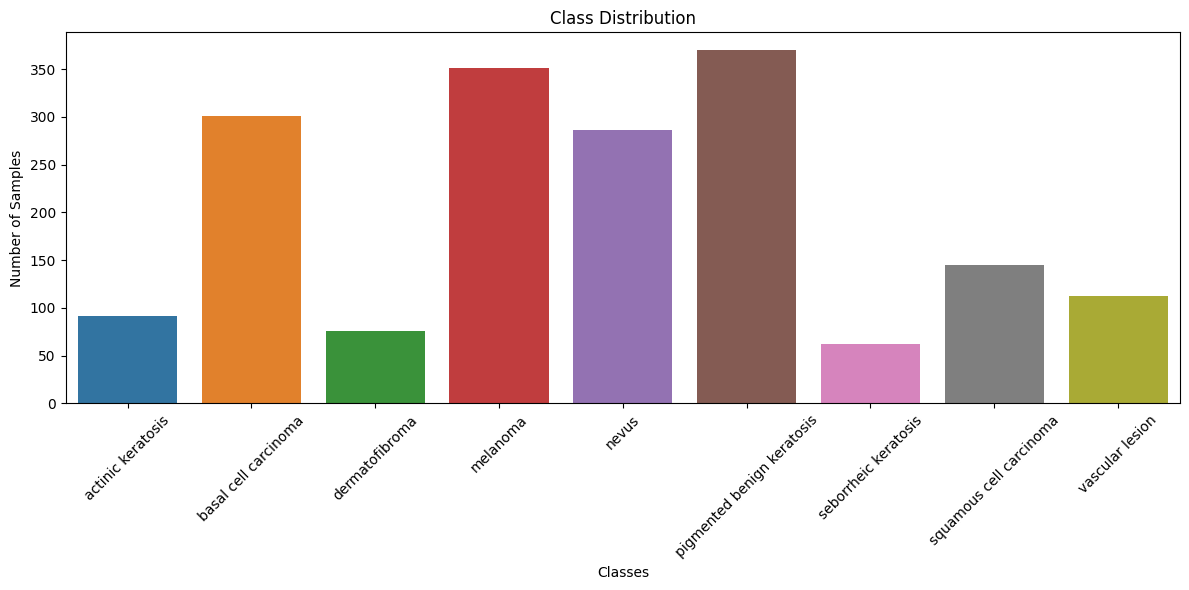

Least represented class: seborrheic keratosis with 62 samples
Most represented class: pigmented benign keratosis with 370 samples


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732025501.396332     140 service.cc:145] XLA service 0x7be4e8006b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732025501.396394     140 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732025501.396398     140 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/57 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.1641 - loss: 3.4963  

I0000 00:00:1732025511.441254     140 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.2974 - loss: 2.6166 - val_accuracy: 0.1959 - val_loss: 11.6365 - learning_rate: 0.0010
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.4431 - loss: 1.7349 - val_accuracy: 0.0338 - val_loss: 6.7837 - learning_rate: 0.0010
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.5225 - loss: 1.4947 - val_accuracy: 0.1689 - val_loss: 3.0634 - learning_rate: 0.0010
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.5375 - loss: 1.4490 - val_accuracy: 0.1689 - val_loss: 3.2332 - learning_rate: 0.0010
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.5786 - loss: 1.2658 - val_accuracy: 0.1734 - val_loss: 5.7872 - learning_rate: 0.0010
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.5749 - loss: 1.2545 - val_accuracy: 0.1712 - val_loss: 4.2877 - learning_rate: 0.0010
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - accuracy: 0.6310 - loss: 1.0405 - val

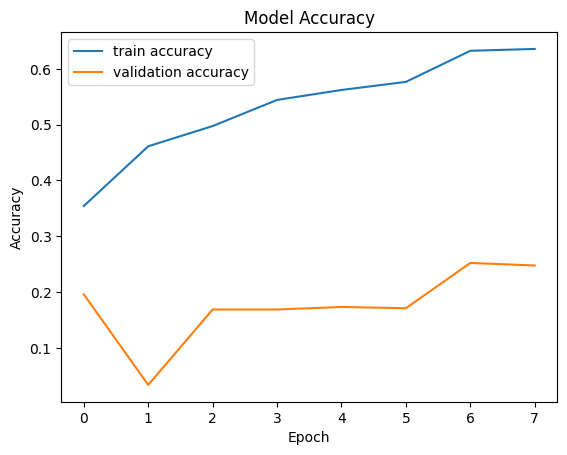

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 44s 589ms/step - accuracy: 0.3156 - loss: 2.7432 - val_accuracy: 0.1689 - val_loss: 6.9506 - learning_rate: 0.0010
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0.3772 - loss: 2.0496 - val_accuracy: 0.1689 - val_loss: 5.9027 - learning_rate: 0.0010
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 464ms/step - accuracy: 0.4440 - loss: 1.7956 - val_accuracy: 0.1712 - val_loss: 4.8351 - learning_rate: 0.0010
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - accuracy: 0.4427 - loss: 1.7530 - val_accuracy: 0.1689 - val_loss: 4.2214 - learning_rate: 0.0010
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step - accuracy: 0.4785 - loss: 1.6231 - val_accuracy: 0.1712 - val_loss: 3.2783 - learning_rate: 0.0010
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step - accuracy: 0.4827 - loss: 1.5584 - val_accuracy: 0.2410 - val_loss: 2.8824 - learning_rate: 0.0010

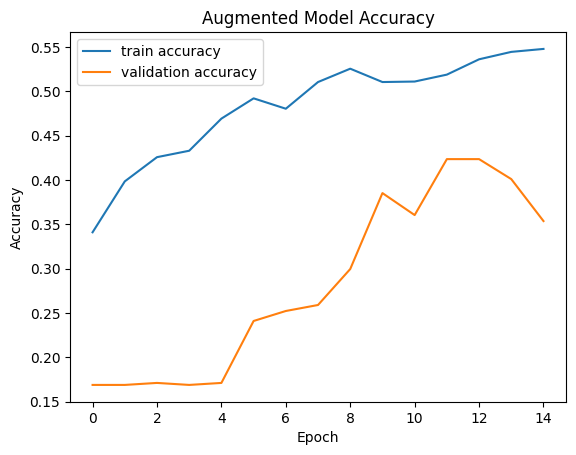

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 586ms/step - accuracy: 0.3126 - loss: 2.6941 - val_accuracy: 0.0428 - val_loss: 9.7285 - learning_rate: 0.0010
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 474ms/step - accuracy: 0.4142 - loss: 1.9503 - val_accuracy: 0.1689 - val_loss: 6.2482 - learning_rate: 0.0010
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.4215 - loss: 1.7956 - val_accuracy: 0.1712 - val_loss: 4.0123 - learning_rate: 0.0010
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - accuracy: 0.4416 - loss: 1.7468 - val_accuracy: 0.2207 - val_loss: 3.0246 - learning_rate: 0.0010
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.4371 - loss: 1.6297 - val_accuracy: 0.2185 - val_loss: 2.4076 - learning_rate: 0.0010
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.4780 - loss: 1.5531 - val_accuracy: 0.1892 - val_loss: 2.6002 - learning_rate: 0.0010
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.4711 - loss: 1.

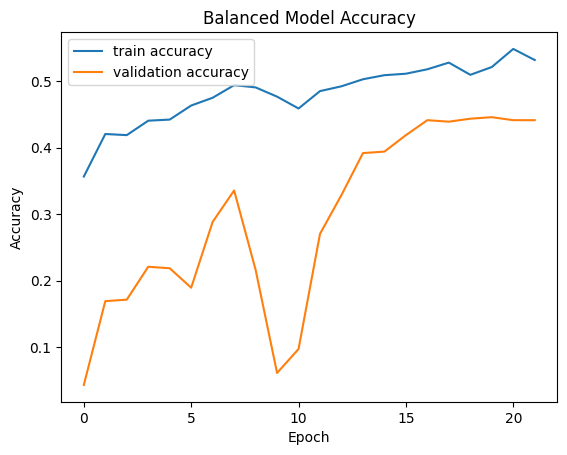

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, 
    Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns

# 1. Dataset Creation and Visualization
def create_dataset_generators(train_dir, target_size=(180, 180), batch_size=32):
    """
    Create train and validation data generators
    """
    # Basic data generator for initial exploration
    datagen = ImageDataGenerator(
        rescale=1./255,  # Normalize pixel values
        validation_split=0.2  # 20% validation split
    )
    
    # Train generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    # Validation generator
    valid_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_generator, valid_generator

def visualize_dataset_classes(train_dir, target_size=(180, 180)):
    """
    Visualize one instance from each class
    """
    # Basic data generator
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Get class directories
    classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    
    # Plotting
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(classes, 1):
        # Find first image in the class directory
        class_path = os.path.join(train_dir, cls)
        image_path = os.path.join(class_path, os.listdir(class_path)[0])
        
        # Read and plot image
        img = plt.imread(image_path)
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 2. Class Distribution Analysis
def analyze_class_distribution(train_generator):
    """
    Analyze class distribution in the dataset
    """
    # Get class indices
    class_indices = train_generator.class_indices
    
    # Count samples per class
    class_counts = {}
    for cls, idx in class_indices.items():
        class_counts[cls] = sum(train_generator.classes == idx)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Find least and most represented classes
    least_class = min(class_counts, key=class_counts.get)
    most_class = max(class_counts, key=class_counts.get)
    
    print(f"Least represented class: {least_class} with {class_counts[least_class]} samples")
    print(f"Most represented class: {most_class} with {class_counts[most_class]} samples")
    
    return class_counts

# 3. Model Building
def create_cnn_model(input_shape=(180, 180, 3), num_classes=9):
    """
    Create a CNN model for classification
    """
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Flatten and Dense Layers
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(),  # Change here
        metrics=['accuracy']
    )
    
    return model

# 4. Training and Evaluation
def train_model(model, train_generator, valid_generator, epochs=20):
    """
    Train the model with early stopping and learning rate reduction
    """
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=0.00001
    )
    
    # Training
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=epochs,
        callbacks=[early_stopping, reduce_lr]
    )
    
    return history

# 5. Data Augmentation Strategy
def create_augmented_generators(train_dir, target_size=(180, 180), batch_size=32):
    """
    Create data generators with advanced augmentation
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )
    
    # Train generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    # Validation generator
    valid_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_generator, valid_generator

# 6. Class Imbalance Handling
def handle_class_imbalance(train_generator):
    """
    Handle class imbalance using class weights
    """
    # Calculate class weights
    class_weights = {}
    total_samples = len(train_generator.classes)
    
    for cls, count in train_generator.class_indices.items():
        class_samples = sum(train_generator.classes == count)
        class_weights[count] = total_samples / (len(train_generator.class_indices) * class_samples)
    
    return class_weights

# 7. Main Execution
def main():
    # Define paths
    train_dir = '/kaggle/working/melanoma_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
    
    # Create dataset generators
    train_generator, valid_generator = create_dataset_generators(train_dir)
    
    # Visualize dataset classes
    visualize_dataset_classes(train_dir)
    
    # Analyze class distribution
    class_counts = analyze_class_distribution(train_generator)
    
    # Create and train the initial CNN model
    model = create_cnn_model()
    history = train_model(model, train_generator, valid_generator)
    
    # Check for overfitting/underfitting
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    # Create augmented data generators
    augmented_train_generator, augmented_valid_generator = create_augmented_generators(train_dir)
    
    # Create and train the CNN model on augmented data
    augmented_model = create_cnn_model()
    augmented_history = train_model(augmented_model, augmented_train_generator, augmented_valid_generator)
    
    # Check for improvements
    plt.plot(augmented_history.history['accuracy'], label='train accuracy')
    plt.plot(augmented_history.history['val_accuracy'], label='validation accuracy')
    plt.title('Augmented Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    # Handle class imbalance
    class_weights = handle_class_imbalance(train_generator)
    
    # Create and train the model on rectified class imbalance data
    balanced_model = create_cnn_model()
    balanced_history = train_model(balanced_model, augmented_train_generator, augmented_valid_generator, epochs=30)
    
    # Final evaluation
    plt.plot(balanced_history.history['accuracy'], label='train accuracy')
    plt.plot(balanced_history.history['val_accuracy'], label='validation accuracy')
    plt.title('Balanced Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()